<div align="center">

# MEGR7172/8172

### Computational Methods (Fall 2025)
### Duke 227, Tu/Th 08:30 - 09:45 pm

</div>


# 14. Introduction to PDE
In this lecture, we aim to understand partial differential equation (PDE) classifications and finite difference fundamentals. Specifically, we want to acheive the following goals.

- The description of PDE in the context of 1D heat equation,
- How to analyticall solve the a simple PDE,
- Derive and use finite difference method to solve the PDE numerically.

## 14.1 A motivating PDE example (the heat equation)

Suppose we model temperature (or concentration) along a one‑dimensional rod. We are interested in knowing the change of temperature as the function of location ($x$) and time ($t$).

- $u(x,t)$: The temperature at position $x$ and time $t$.
- $q(x,t)$: The heat flux at position $x$ and time $t$.

To describe the process, we need to apply two laws:

**Fourier's law of heat conduction.** The rate of flow of heat energy per unit area through a surface is proportional to the negative temperature gradient across it: $ q =-\kappa \,\nabla u $, where $\kappa$ is the thermal conductivity of the material. In the 1D case, this becomes 

$$ 
q(x,t) = -\kappa \frac{\partial u(x,t)}{\partial x} 
$$

**Conservation of energy.** The rate at which heat changes at a given point $x$ is equal to the derivative of the heat flow at that point $x$. To express this mathematically, we write $Q(x,t)$ as the total heat energy in a small segment of the rod from $x$ to $x + \Delta x$ at time $t$:

$$
\frac{\partial Q(x, t)}{\partial t} + \frac{\partial q(x, t)}{\partial x} = 0
$$

In addition, the rate change of $Q(x,t)$ at $x$ should be proportional to the rate of change of its temperature
$$
\frac{\partial Q(x, t)}{\partial t} = c \, \frac{\partial u(x, t)}{\partial t}
$$
Where $c$ is a constant depending on the material properties of the rod.

Combining the above three equations, we have
$$
c \, \frac{\partial u(x, t)}{\partial t} = \kappa \, \frac{\partial^2 u(x, t)}{\partial x^2}
$$

Or equivalently,
$$
\frac{\partial u(x, t)}{\partial t} = \alpha \, \frac{\partial^2 u(x, t)}{\partial x^2}
$$
Where $\alpha = \kappa / c$ is called the thermal diffusivity of the material.

To solve this PDE, we will consider both analytical and numerical methods in the following sections.

## 14.2 Analytical solutions of the heat equation

We can solve the heat equation with separation of variables. Assume the solution can be written as a product of functions, each depending on a single variable $u(x,t)=X(x)T(t)$.

Plugging into
$$
u_t = \alpha u_{xx}
$$
gives
$$
X(x)T'(t) = \alpha X''(x)T(t).
$$
Divide by $\alpha X(x)T(t)$ to separate variables:
$$
\frac{T'(t)}{\alpha T(t)}=\frac{X''(x)}{X(x)} = -\lambda,
$$
where $-\lambda$ is the separation constant. This yields two ordinary differential equations:
$$
X''(x) + \lambda X(x) = 0
$$
$$
T'(t) + \alpha\lambda T(t)=0.
$$

## 14.2.1 General solutions

Clearly, 
- The spatial solution satisfies $X'' + \lambda X = 0$, so for $\lambda>0$ the general form is
    $$
    X(x)=A\cos\!\big(\sqrt{\lambda}\,x\big)+B\sin\!\big(\sqrt{\lambda}\,x\big),
    $$
- The temporal factor solves $T'(t)+\alpha\lambda T(t)=0$, hence
    $$
    T(t)=C\exp\!\big(-\alpha\lambda t\big).
    $$

## 14.2.2 Boundary conditions
However, one must be careful with the **choice of $\lambda$**. 

For a rod of length $L$ with 
$$
u(0,t)=u(L,t)=0
$$ 
also called Dirichlet Boundary conditions), 
the spatial eigenproblem gives nontrivial solutions only for
$$
\lambda_n=\left(\frac{n\pi}{L}\right)^2,\qquad n=1,2,\dots,
$$

Correpondindly, the initial values should also satisfy this, a common choice is
$$ 
u(x) = x \times (L-x)
$$

### 14.2.3 Final solutions
Under the Dirichlet BC, the suitable solutions are
$$
X_n(x)=\sin\!\left(\frac{n\pi x}{L}\right).
$$
$$
T_n(t)=\exp\!\left(-\alpha\lambda_n t\right)=\exp\!\left(-\alpha\left(\frac{n\pi}{L}\right)^2 t\right).
$$


And the general solution satisfying the Dirichlet BCs is the eigenseries
$$
u(x,t)=\sum_{n=1}^\infty a_n \,e^{-\alpha (n\pi/L)^2 t}\sin\!\left(\frac{n\pi x}{L}\right).
$$

where $a_n$ cofficients need to satisfy
$$
a_n=\frac{2}{L}\int_0^L u(x,0)\,\sin\!\left(\frac{n\pi x}{L}\right)\,dx,\qquad n=1,2,\dots
$$

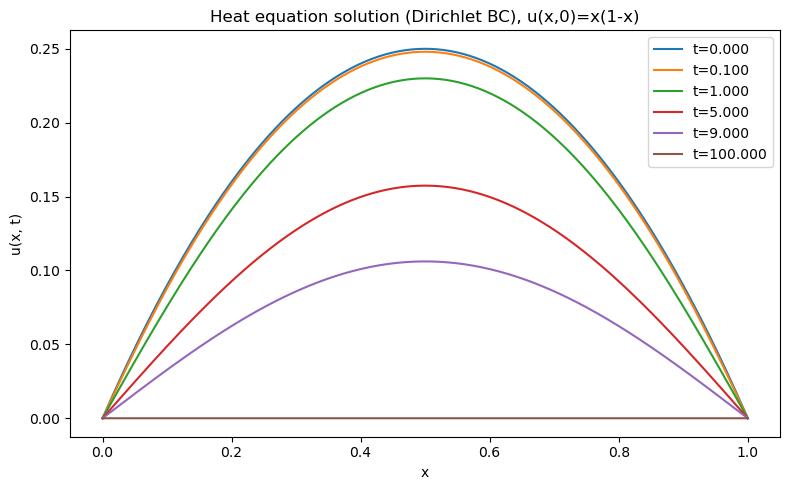

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# parameters
L = 1.0
alpha = 0.01
N_modes = 80

# spatial grid for plotting and for computing coefficients
Nx_plot = 300
x_plot = np.linspace(0, L, Nx_plot)

Nx_int = 2000
x_int = np.linspace(0, L, Nx_int)

# initial condition (satisfies u(0)=u(L)=0)
def u0(x):
    return x * (1 - x)  # example: parabola, zero at endpoints

# compute Fourier sine coefficients a_n = (2/L) * integral_0^L u0(x) sin(n*pi*x/L) dx
n = np.arange(1, N_modes + 1)
sin_int = np.sin(np.pi * np.outer(n, x_int) / L)
u0_vals_int = u0(x_int)
a_n = (2.0 / L) * np.trapz(u0_vals_int * sin_int, x_int, axis=1)

# precompute sin(n*pi*x) on plotting grid
sin_plot = np.sin(np.pi * np.outer(n, x_plot) / L)

# times to plot
times = [0.0, 0.1, 1.0, 5.0, 9.0, 100.0]

plt.figure(figsize=(8, 5))
for t in times:
    decay = np.exp(-alpha * (np.pi * n / L) ** 2 * t)[:, None]  # shape (N_modes,1)
    u_xt = (a_n[:, None] * decay * sin_plot).sum(axis=0)
    plt.plot(x_plot, u_xt, label=f"t={t:.3f}")

plt.xlabel("x")
plt.ylabel("u(x, t)")
plt.title("Heat equation solution (Dirichlet BC), u(x,0)=x(1-x)")
plt.legend()
plt.tight_layout()
plt.show()

## 14.3 Numerical Solution Using the Finite Difference Method

To solve the heat equation with $u(0,t)=u(L,t)=0$ and given $u(x,0)$, we can also do it numerically. 

Before the formal introduction, let's first change the notation a bit. 

From now on, we will let
$$
u_{x} = \frac{\partial u(x,t)}{\partial x}, \quad 
u_{t} = \frac{\partial u(x,t)}{\partial t}, \quad 
u_{xx} = \frac{\partial^2 u(x,t)}{\partial x^2} \quad
u_{xt} = \frac{\partial^2 u(x,t)}{\partial x \partial t}
$$

Next, we transform the problem to the grid world with
- Spatial grid: $x_i = i\,\Delta x,\quad i=0,\dots,N_x,\quad \Delta x = L/N_x$
- Time grid: $t_j = j\,\Delta t,\quad j=0,\dots,N_t$

Hence $u(i, j)$ represents the temperature at location $x_i$ and time $t_j$

In this context, the 2nd order derivative of $u$ with respect to $x$ can be numerical evaluated as
$$
u_{xx}(i, j) ≈ [u(i+1, j) − 2 u(i, j) + u(i-1, j)] / \Delta x^2
$$

According to the PDE equation,
$$
u_{t}(i, j) \Delta t = \alpha u_{xx}({i, j}) \Delta t = [u(i+1, j) − 2 u(i, j) + u(i-1, j)] \alpha \Delta t/ \Delta x^2 
$$

Let $\Delta x = \frac{L}{N}x$, choose $\Delta t$ and define the mesh ratio
$$
r = α \Delta t / \Delta x^2
$$.

We get 
$$
u_{t}(i, j) \Delta t =  r [u(i+1, j) − 2 u(i, j) + u(i−1, j)]
$$

Thus, we can update $u(i, j+1)$ as follows
$$
u(i, j+1) = u(i, j) + r [u(i+1, j) − 2 u(i, j) + u(i−1, j)].
$$

Let's try to enable it with the actual code.


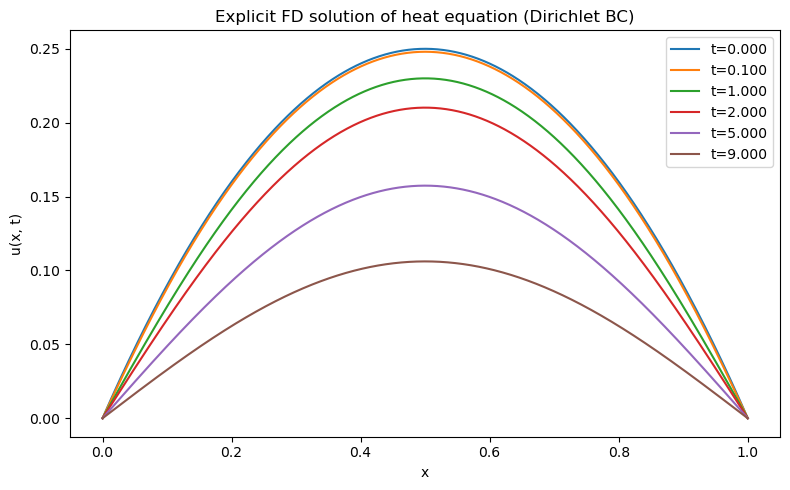

In [22]:
# Parameters
L = 1.0
alpha = 0.01
t_max = 10.0
Nx = 1000

# Grid and time step
dx = L / Nx
dt = 0.4 * dx * dx / alpha     # safe choice: r = 0.4 <= 0.5
Nt = int(t_max / dt)           # run until t_final ~ 1.0 (adjust as needed)

# grid and initial condition
x = np.linspace(0, L, Nx + 1)
u = x * (1 - x)              # u(0)=u(L)=0 by construction

r = alpha * dt / dx**2

# times to capture (must be <= t_final)
times_plot = [0.0, 0.1, 1.0, 2.0, 5.0, 9.0]
idx_list = [int(round(t / dt)) for t in times_plot]

# store snapshots
snapshots = {}
snapshots[0] = u.copy()

# time stepping
for n in range(Nt):
    u_new = u.copy()
    u_new[1:-1] = u[1:-1] + r * (u[2:] - 2 * u[1:-1] + u[:-2])
    u_new[0] = 0.0
    u_new[-1] = 0.0
    u = u_new
    if (n + 1) in idx_list:
        snapshots[n + 1] = u.copy()

# plot snapshots
plt.figure(figsize=(8, 5))
for t, idx in zip(times_plot, idx_list):
    plt.plot(x, snapshots[idx], label=f"t={t:.3f}")
plt.xlabel("x")
plt.ylabel("u(x, t)")
plt.title("Explicit FD solution of heat equation (Dirichlet BC)")
plt.legend()
plt.tight_layout()
plt.show()



Overall, the results look very similar to what we found in the analytical solution. This is a good sign. We will continue the numerical challenge in the following lectures.